In [15]:
from pathlib import Path

import ll
from rich import print

base_path = Path(
    "/workspaces/repositories/jmp-peft/config/finetune/jmp_l/lltrainer/mcezpn6d/activation"
)
acts = {
    k[len("training_step.batch_dump_if_loss_gt::") :]: v
    for k, v in ll.ActLoad.from_latest_version(base_path).activations.items()
}
print(acts)

{
    'natoms': LoadedActivation(name='training_step.batch_dump_if_loss_gt::natoms', num_activations=6),
    'y_norm_std': LoadedActivation(name='training_step.batch_dump_if_loss_gt::y_norm_std', num_activations=6),
    'force': LoadedActivation(name='training_step.batch_dump_if_loss_gt::force', num_activations=6),
    'y_norm_mean': LoadedActivation(name='training_step.batch_dump_if_loss_gt::y_norm_mean', num_activations=6),
    'pos': LoadedActivation(name='training_step.batch_dump_if_loss_gt::pos', num_activations=6),
    'force_norm_mean': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::force_norm_mean',
        num_activations=6
    ),
    'y': LoadedActivation(name='training_step.batch_dump_if_loss_gt::y', num_activations=6),
    'force_norm_std': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::force_norm_std',
        num_activations=6
    ),
    'tags': LoadedActivation(name='training_step.batch_dump_if_loss_gt::tags', num_activations=6),
    'fixed': LoadedActivation(name='training_step.batch_dump_if_loss_gt::fixed', num_activations=6),
    'cell': LoadedActivation(name='training_step.batch_dump_if_loss_gt::cell', num_activations=6),
    'atomic_numbers': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::atomic_numbers',
        num_activations=6
    ),
    'ptr': LoadedActivation(name='training_step.batch_dump_if_loss_gt::ptr', num_activations=6),
    'a2a_vector': LoadedActivation(name='training_step.batch_dump_if_loss_gt::a2a_vector', num_activations=6),
    'main_vector': LoadedActivation(name='training_step.batch_dump_if_loss_gt::main_vector', num_activations=6),
    'a2ee2a_vector': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::a2ee2a_vector',
        num_activations=6
    ),
    'main_max_neighbors': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::main_max_neighbors',
        num_activations=6
    ),
    'batch': LoadedActivation(name='training_step.batch_dump_if_loss_gt::batch', num_activations=6),
    'main_edge_index': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::main_edge_index',
        num_activations=6
    ),
    'a2ee2a_edge_index': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::a2ee2a_edge_index',
        num_activations=6
    ),
    'a2a_cell_offset': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::a2a_cell_offset',
        num_activations=6
    ),
    'a2a_num_neighbors': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::a2a_num_neighbors',
        num_activations=6
    ),
    'main_distance': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::main_distance',
        num_activations=6
    ),
    'a2a_edge_index': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::a2a_edge_index',
        num_activations=6
    ),
    'a2a_max_neighbors': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::a2a_max_neighbors',
        num_activations=6
    ),
    'main_cell_offset': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::main_cell_offset',
        num_activations=6
    ),
    'main_cutoff': LoadedActivation(name='training_step.batch_dump_if_loss_gt::main_cutoff', num_activations=6),
    'a2a_distance': LoadedActivation(name='training_step.batch_dump_if_loss_gt::a2a_distance', num_activations=6),
    'a2a_cutoff': LoadedActivation(name='training_step.batch_dump_if_loss_gt::a2a_cutoff', num_activations=6),
    'a2ee2a_distance': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::a2ee2a_distance',
        num_activations=6
    ),
    'main_num_neighbors': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::main_num_neighbors',
        num_activations=6
    ),
    'qint_cell_offset': LoadedActivation(
        name='training_step.batch_dump_if_loss_gt::qint_cell_offset',
        num_activations=6
    ),
    'qint_distance

In [82]:
import numpy as np

losses = np.array(acts["loss"].all_activations())
print(losses)
max_loss_idx = int(np.argmax(losses).item())
print(max_loss_idx)

acts_max_loss = {k: v[max_loss_idx] for k, v in acts.items()}
# print(acts_max_loss)

[ 3.03098345 18.18091202 16.96941757  5.27303839  3.76093626  9.39714718]

1

In [83]:
import ase
from ase.visualize import view

batch = acts_max_loss["batch"]
print(batch)

batch_idx = 1

mask = batch == batch_idx
pos = acts_max_loss["pos"][mask]
atomic_numbers = acts_max_loss["atomic_numbers"][mask]
cell = acts_max_loss["cell"][batch_idx]
print(pos.shape, atomic_numbers.shape, cell.shape)

atoms = ase.Atoms(positions=pos, numbers=atomic_numbers, cell=cell, pbc=True)
view(atoms, viewer="x3d")

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]

(10, 3)
(10,)
(3, 3)

In [84]:
acts_max_loss["force_norm_std"]

array([[0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145],
       [0.5662145, 0.5662145, 0.5662145]], dtype=float32)

[[-0.03251337  0.0122069   0.06210153]
 [ 0.03251337 -0.0122069  -0.06210153]
 [-0.08024556  0.1159025  -0.0609748 ]
 [ 0.08024556 -0.1159025   0.0609748 ]
 [-0.13018641 -0.34788927 -0.44845027]
 [ 0.13018641  0.34788927  0.44845027]
 [ 0.43402606 -0.12534809  0.09933247]
 [-0.43402606  0.12534809 -0.09933247]
 [ 0.06824564 -0.05978027  0.12320895]
 [-0.06824564  0.05978027 -0.12320895]
 [ 0.16907957  0.15448155  0.1718485 ]
 [-0.16907957 -0.15448155 -0.1718485 ]
 [-0.05616529  0.18784478  0.02098663]
 [ 0.05616529 -0.18784478 -0.02098663]
 [ 0.17258786  0.14199537  0.01786762]
 [-0.17258786 -0.14199537 -0.01786762]
 [-0.1256511  -0.01649612 -0.10137517]
 [ 0.1256511   0.01649612  0.10137517]
 [ 0.01549073  0.08165941  0.07839556]
 [ 0.10544122 -0.24709031  0.07136884]
 [-0.10544122  0.24709031 -0.07136884]
 [-0.01549073 -0.08165941 -0.07839556]]

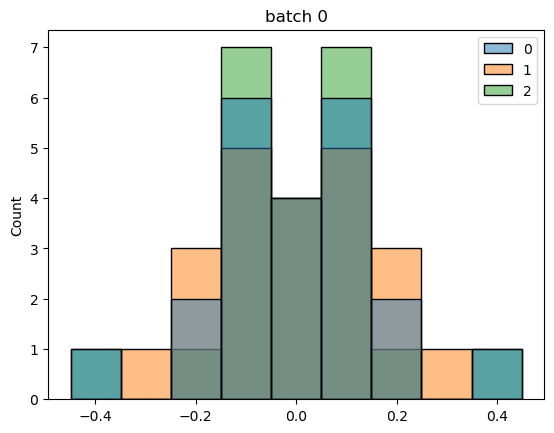

[[ 2.6319096e+00  1.6532730e+00 -1.6773552e+01]
 [ 2.4730349e+00  4.4663224e-01  1.6829544e+01]
 [-5.8767217e-01 -5.8173709e-02  4.9456799e-01]
 [-1.7001188e+00 -2.9844186e-01 -2.4337496e-01]
 [ 3.3901780e+00 -9.1286463e-01  2.1099684e+00]
 [-1.5605652e+00  3.9677334e-01  1.3139397e+00]
 [ 4.3448818e+01 -4.3991352e+01 -3.1672865e+01]
 [ 4.2013144e+00  4.7694578e+00  5.2209630e+00]
 [-3.5799458e+01 -3.7631756e+01 -3.2327957e+01]
 [-4.8438349e+00 -5.0499144e+00  4.9683117e+01]
 [ 3.6027527e+01  3.7388592e+01 -2.2248291e+01]
 [-1.9092414e+00  2.4005854e+00 -1.1329174e+00]
 [-2.6799161e+00 -2.0721376e+00 -4.4456226e-01]
 [-5.4390375e+02  5.4270142e+02 -3.7830817e+02]
 [-6.9300675e+00  6.9392977e+00 -4.9357258e+01]
 [ 5.0774182e+02 -5.0668137e+02  4.5685684e+02]]

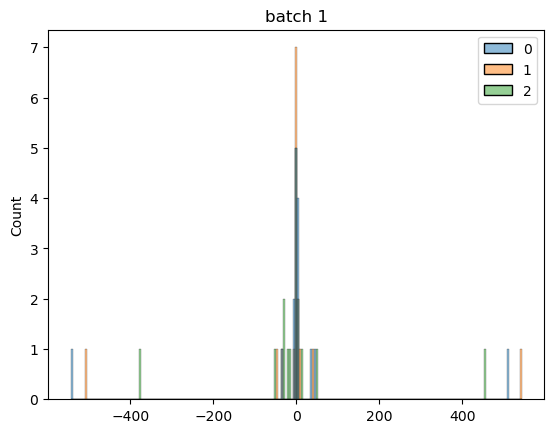

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

losses = np.array(acts["loss"].all_activations())
# print(losses)
max_loss_idx = int(np.argmax(losses).item()) + 1
# print(max_loss_idx)

acts_max_loss = {k: v[max_loss_idx] for k, v in acts.items()}
# print(acts_max_loss)
for batch_idx in (0, 1):
    batch = acts_max_loss["batch"]

    mask = batch == batch_idx
    forces = (acts_max_loss["force"] * acts_max_loss["force_norm_std"])[mask]
    # forces = np.linalg.norm(forces, axis=-1)
    print(forces)

    ax = sns.histplot(forces)
    ax.set_title(f"batch {batch_idx}")
    plt.show()

In [37]:
acts_max_loss["a2ee2a_distance"].sort()
acts_max_loss["a2ee2a_distance"]

array([0.9888672 , 0.9888672 , 0.98886734, 0.98886734, 1.2636429 ,
       1.2636429 , 1.270514  , 1.270514  , 2.6180475 , 2.6180475 ,
       2.6180475 , 2.6180475 , 2.7466238 , 2.7466238 , 2.7584438 ,
       2.7584438 , 2.9423687 , 2.9423687 , 2.9423687 , 2.9423687 ,
       2.9444432 , 2.9444432 , 2.9495814 , 2.9495814 , 2.9495814 ,
       2.9495814 , 2.95484   , 2.95484   , 2.95484   , 2.95484   ,
       2.9569056 , 2.9569056 , 2.9569058 , 2.9569058 , 2.9569058 ,
       2.9569058 , 2.960099  , 2.960099  , 2.960099  , 2.960099  ,
       3.2618992 , 3.2618992 , 3.2618992 , 3.2618992 , 3.2831569 ,
       3.2831569 , 3.2906685 , 3.2906685 , 3.2930217 , 3.2930217 ,
       3.2949905 , 3.2949905 , 3.33      , 3.33      , 3.33029   ,
       3.33029   , 3.3434873 , 3.3434873 , 3.3437297 , 3.3437297 ,
       3.5002406 , 3.5002406 , 3.5251698 , 3.5251698 , 3.540517  ,
       3.540517  , 3.5471041 , 3.5471041 , 3.5825741 , 3.5825741 ,
       3.5849414 , 3.5849414 , 3.6237571 , 3.6237571 , 3.63478

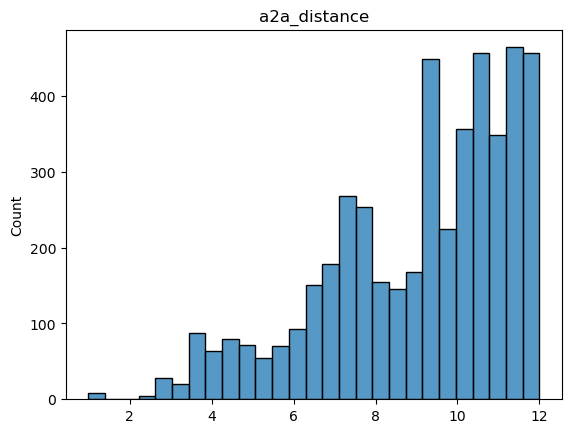

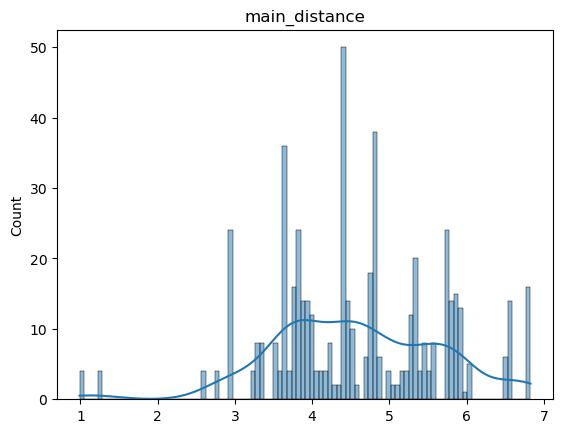

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.histplot(acts_max_loss["a2a_distance"])
ax.set_title("a2a_distance")
plt.show()

ax = sns.histplot(acts_max_loss["main_distance"], kde=True, bins=100)
ax.set_title("main_distance")
plt.show()